Assignment
For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
pd.__version__

'1.3.5'

In [3]:
df = pd.read_csv("D:\\Data\\fcc-forum-pageviews.csv", parse_dates = ['date'])
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.set_index(['date'], inplace=True)
df

,value,year,month
date,,,
2016-05-09,1201,2016,5
2016-05-10,2329,2016,5
2016-05-11,1716,2016,5
2016-05-12,10539,2016,5
2016-05-13,6933,2016,5
...,...,...,...
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11
2019-12-01,142918,2019,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
 1   year    1304 non-null   int64
 2   month   1304 non-null   int64
dtypes: int64(3)
memory usage: 40.8 KB


In [5]:
df.describe()

,value,year,month
count,1.304000e+03,1304.000000,1304.000000
mean,6.722068e+04,2017.615031,6.788344
std,5.933964e+04,1.057352,3.314146
min,1.201000e+03,2016.000000,1.000000
25%,3.575775e+04,2017.000000,4.000000
50%,5.719750e+04,2018.000000,7.000000
75%,8.388300e+04,2019.000000,10.000000
max,1.173655e+06,2019.000000,12.000000


In [6]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


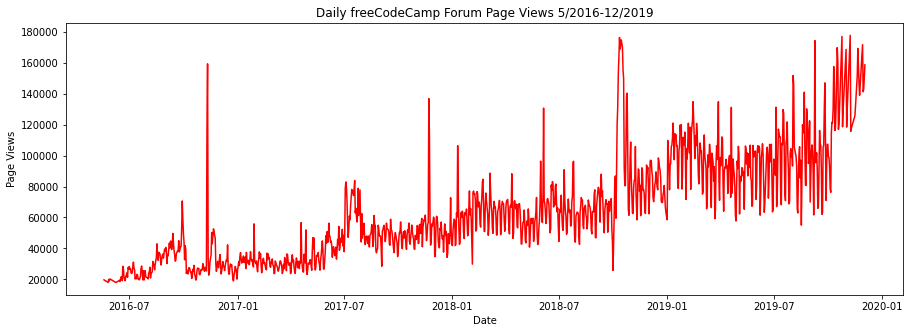

In [7]:
df_line = df.copy(deep=True)
fig = plt.figure(figsize= (15, 5))
plt.plot(df_line.index, df_line['value'], c='r')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

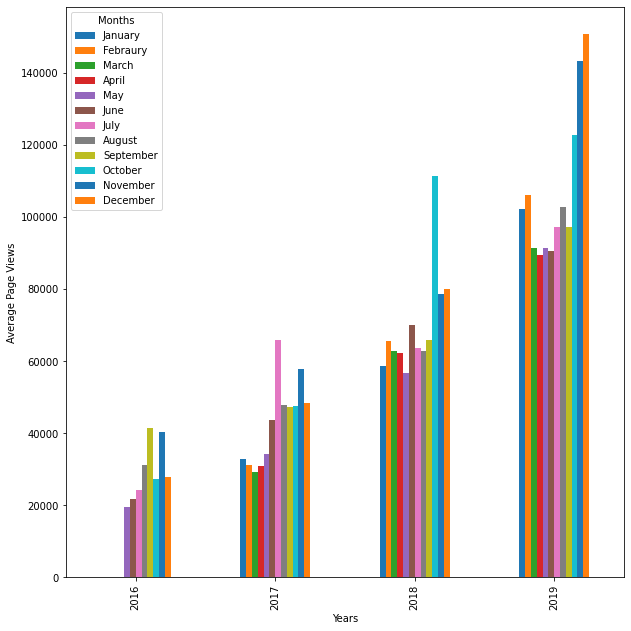

In [8]:
def draw_bar_plot():
    df_bar = df.copy(deep=True)
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    fig = plt.figure()
    df_bar.plot(kind='bar', figsize=(10, 10.5))
    plt.legend(['January', 'Febraury', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()  

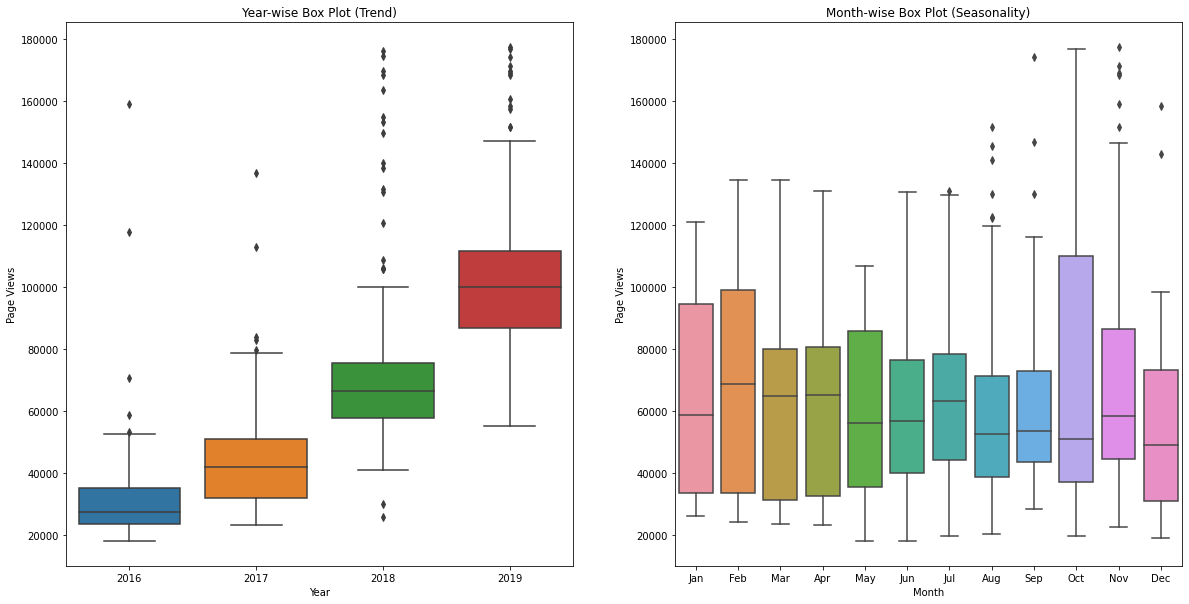

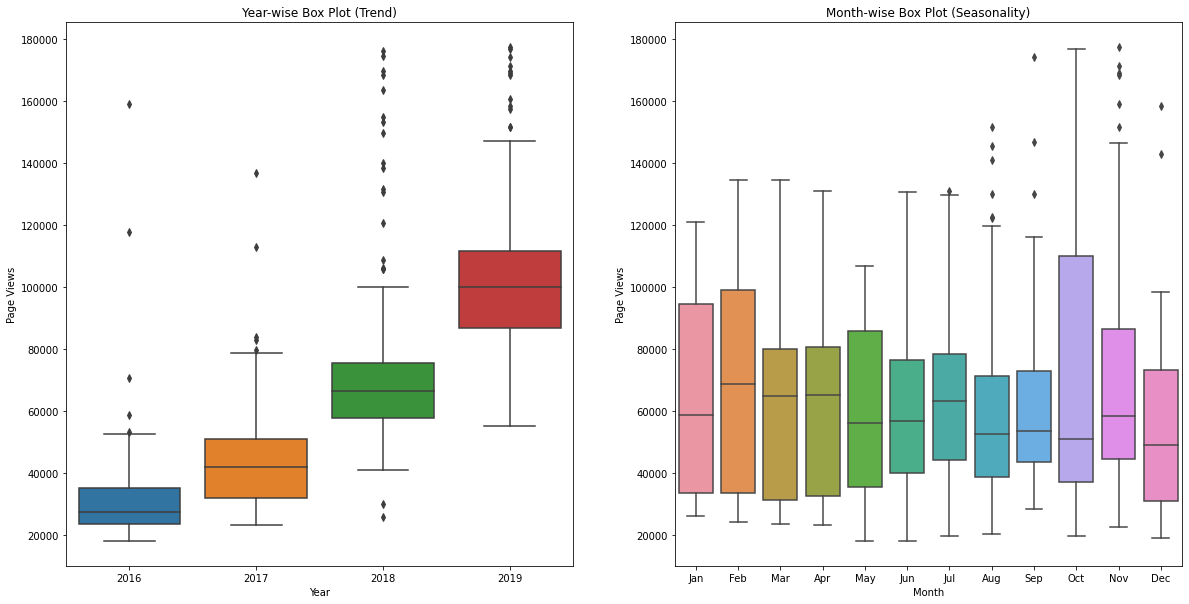

In [9]:
def draw_box_plot():
    df_box = df.copy(deep=True)
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')
    fig, axes = plt.subplots(nrows =1, ncols = 2, figsize = (20, 10))
    axes[0] = sns.boxplot(x=df_box['year'], y=df_box['value'], ax= axes[0])
    axes[1] = sns.boxplot(x=df_box['month'], y=df_box['value'], ax= axes[1])
    
    axes[0].set_title('Year-wise Box Plot (Trend)') 
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    axes[1].set_title('Month-wise Box Plot (Seasonality)') 
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()